<a href="https://colab.research.google.com/github/azamaufar/supplychainDA/blob/main/EDA_Supply_Chain_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the available data, you can still perform some analyses, including:

2. Inventory analysis: You can use the 'Sales' and 'Order Item Quantity' columns to analyze inventory levels and ensure that you have enough inventory to meet customer demand. By understanding the demand patterns, you can optimize production schedules and inventory levels.

3. Supplier analysis: Although you may not have data specifically related to suppliers, you can use the 'Product Name' and 'Product Price' columns to evaluate the performance of different products. By analyzing product quality, pricing, and popularity, you can identify which products are most profitable and adjust your product mix accordingly.

4. Demand forecasting: You can use historical data from the 'Sales' column to predict future demand for products. This can help you optimize production schedules, inventory levels, and transportation routes.

5. Transportation analysis: You can analyze the 'Days for shipping (real)' and 'Days for shipment (scheduled)' columns to optimize transportation routes, modes, and carriers. By reducing transportation costs and improving delivery times, you can enhance customer satisfaction.

Overall, while there may be some limitations due to the data available, you can still perform several analyses to optimize your supply chain and reduce costs.

# Phase 1: Data Cleaning and Preparation
In this phase, the data will be cleaned and prepared for analysis. The accuracy and completeness of the data will be verified, and the data will be formatted suitably for analysis.

Import necessary library

In [27]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime as dt
from statistics import mode

from IPython.display import Image
sns.set(style="darkgrid")

In [2]:
# Import dataset

df=pd.read_csv("/home/gaza/supplychainDA/data/dataset.csv",
               parse_dates=['order date (DateOrders)','shipping date (DateOrders)'],
               )
for categorical_col in ["Category Name", "Shipping Mode",'Department Name', "Order Status",
                        'Customer Segment', "Type", "Delivery Status", "Market"]:
    df[categorical_col] = df[categorical_col].astype(
        "category"
    )
df.drop(['Product Description','Product Image','Order Zipcode', "Customer Password",
         "Customer Fname", "Customer Email"], 
        axis=1,
        inplace=True)
df = df.dropna(axis=1)

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,False,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,False,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,False,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,False,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,False,2018-01-15 11:24:00,Standard Class


Dataset Description

|FIELDS| DESCRIPTION |
|------|-------------|
|Type|  Type of transaction made |
|Days for shipping (real)|  Actual shipping days of the purchased product|
|Days for shipment (scheduled)|  Days of scheduled delivery of the purchased product|
|Benefit per order|  Earnings per order placed|
|Sales per customer|  Total sales per customer made per customer|
|Delivery Status|  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"|
|Late_delivery_risk|  Categorical variable that indicates if sending is late (1), it is not late (0)."|
|Category Id|  Product category code|
|Category Name|  Description of the product category|
|Customer City|  City where the customer made the purchase|
|Customer Country|  Country where the customer made the purchase|
|Customer Email|  Customer's email|
|Customer Fname|  Customer name|
|Customer Id|  Customer ID|
|Customer Lname|  Customer lastname|
|Customer Password|  Masked customer key|
|Customer Segment|  Types of Customers: Consumer , Corporate , Home Office"|
|Customer State|  State to which the store where the purchase is registered belongs|
|Customer Street|  Street to which the store where the purchase is registered belongs|
|Customer Zipcode|  Customer Zipcode|
|Department Id|  Department code of store|
|Department Name|  Department name of store|
|Latitude|  Latitude corresponding to location of store|
|Longitude|  Longitude corresponding to location of store|
|Market|  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA"|
|Order City|  Destination city of the order|
|Order Country|  Destination country of the order|
|Order Customer Id|  Customer order code|
|order date (DateOrders)|  Date on which the order is made|
|Order Id|  Order code|
|Order Item Cardprod Id|  Product code generated through the RFID reader|
|Order Item Discount|  Order item discount value|
|Order Item Discount Rate|  Order item discount percentage|
|Order Item Id|  Order item code|
|Order Item Product Price|  Price of products without discount|
|Order Item Profit Ratio|  Order Item Profit Ratio|
|Order Item Quantity|  Number of products per order|
|Sales|  Value in sales|
|Order Item Total|  Total amount per order|
|Order Profit Per Order|  Order Profit Per Order|
|Order Region|  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA "|
|Order State|  State of the region where the order is delivered|
|Order Status|  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW"|
|Product Card Id|  Product code|
|Product Category Id|  Product category code|
|Product Description|  Product Description|
|Product Image|  Link of visit and purchase of the product|
|Product Name|  Product Name|
|Product Price|  Product Price|
|Product Status|  Status of the product stock :If it is 1 not available , 0 the product is available "|
|Shipping date (DateOrders)|  Exact date and time of shipment|
|Shipping Mode|  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day"|


In [6]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  category      
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  category      
 6   Late_delivery_risk             180519 non-null  bool          
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  category      
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [45]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


we'll translate countries name from esp to eng

In [7]:
countries_esp = ['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',
       'Afganistán', 'Pakistán', 'Vietnam', 'Malasia', 'Finlandia',
       'Rusia', 'Irlanda', 'Noruega', 'Eslovaquia', 'Bélgica', 'Bolivia',
       'Chile', 'Jamaica', 'Yemen', 'Ghana', 'Guinea', 'Etiopía',
       'Bulgaria', 'Kirguistán', 'Georgia', 'Nepal',
       'Emiratos Árabes Unidos', 'Camboya', 'Uganda', 'Lesoto',
       'Lituania', 'Suiza', 'Hungría', 'Dinamarca', 'Haití',
       'Bielorrusia', 'Croacia', 'Laos', 'Baréin', 'Macedonia',
       'República Checa', 'Sri Lanka', 'Zimbabue', 'Eritrea',
       'Burkina Faso', 'Costa Rica', 'Libia', 'Barbados', 'Tayikistán',
       'Siria', 'Guadalupe', 'Papúa Nueva Guinea', 'Azerbaiyán',
       'Turkmenistán', 'Paraguay', 'Jordania', 'Hong Kong', 'Martinica',
       'Moldavia', 'Qatar', 'Mali', 'Albania', 'República del Congo',
       'Bosnia y Herzegovina', 'Omán', 'Túnez', 'Sierra Leona', 'Yibuti',
       'Burundi', 'Montenegro', 'Gabón', 'Sudán del Sur', 'Luxemburgo',
       'Namibia', 'Mauritania', 'Grecia', 'Suazilandia', 'Guyana',
       'Guayana Francesa', 'República Centroafricana', 'Taiwán',
       'Estonia', 'Líbano', 'Chipre', 'Guinea-Bissau', 'Surinam',
       'Belice', 'Eslovenia', 'República de Gambia', 'Botsuana',
       'Armenia', 'Guinea Ecuatorial', 'Kuwait', 'Bután', 'Chad',
       'Serbia', 'Sáhara Occidental']

In [8]:
countries_en = ['Indonesia', 'India', 'Australia', 'China', 'Japan',
       'South Korea', 'Singapore', 'Turkey', 'Mongolia',
       'United States', 'Nigeria', 'Democratic Republic of the Congo',
       'Senegal', 'Morocco', 'Germany', 'France', 'Netherlands',
       'United Kingdom', 'Guatemala', 'El Salvador', 'Panama',
       'Dominican Republic', 'Venezuela', 'Colombia', 'Honduras',
       'Brazil', 'Mexico', 'Uruguay', 'Argentina', 'Cuba', 'Peru',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudan', 'Somalia',
       'Ivory Coast', 'Egypt', 'Italy', 'Spain', 'Sweden',
       'Austria', 'Canada', 'Madagascar', 'Algeria', 'Liberia', 'Zambia',
       'Niger', 'South Africa', 'Mozambique', 'Tanzania', 'Rwanda', 'Israel',
       'New Zealand', 'Bangladesh', 'Thailand', 'Iraq', 'Saudi Arabia',
       'Philippines', 'Kazakhstan', 'Iran', 'Myanmar (Burma)',
       'Uzbekistan', 'Benin', 'Cameroon', 'Kenya', 'Togo', 'Ukraine',
       'Poland', 'Portugal', 'Romania', 'Trinidad and Tobago',
       'Afghanistan', 'Pakistan', 'Vietnam', 'Malaysia', 'Finland',
       'Russia', 'Ireland', 'Norway', 'Slovakia', 'Belgium', 'Bolivia',
       'Chile', 'Jamaica', 'Yemen', 'Ghana', 'Guinea', 'Ethiopia',
       'Bulgaria', 'Kyrgyzstan', 'Georgia', 'Nepal',
       'United Arab Emirates', 'Cambodia', 'Uganda', 'Lesotho',
       'Lithuania', 'Switzerland', 'Hungary', 'Denmark', 'Haiti',
       'Belarus', 'Croatia', 'Laos', 'Bahrain', 'Macedonia',
       'Czech Republic', 'Sri Lanka', 'Zimbabwe', 'Eritrea',
       'Burkina Faso', 'Costa Rica', 'Libya', 'Barbados', 'Tajikistan',
       'Syria', 'Guadeloupe', 'Papua New Guinea', 'Azerbaijan',
       'Turkmenistan', 'Paraguay', 'Jordan', 'Hong Kong', 'Martinique',
       'Moldova', 'Qatar', 'Mali', 'Albania', 'Republic of the Congo',
       'Bosnia and Herzegovina', 'Oman', 'Tunisia', 'Sierra Leone', 'Djibouti',
       'Burundi', 'Montenegro', 'Gabon', 'South Sudan', 'Luxembourg',
       'Namibia', 'Mauritania', 'Greece', 'Swaziland', 'Guyana',
       'French Guiana', 'Central African Republic', 'Taiwan',
       'Estonia', 'Lebanon', 'Cyprus', 'Guinea-Bissau', 'Suriname',
       'Belize', 'Slovenia', 'Republic of The Gambia', 'Botswana',
       'Armenia', 'Equatorial Guinea', 'Kuwait', 'Bhutan', 'Chad',
       'Serbia', 'Western Sahara']

In [9]:
countries_dict = {}
for i in range(len(countries_esp)):
    countries_dict[countries_esp[i]] = countries_en[i]

print(countries_dict)

{'Indonesia': 'Indonesia', 'India': 'India', 'Australia': 'Australia', 'China': 'China', 'Japón': 'Japan', 'Corea del Sur': 'South Korea', 'Singapur': 'Singapore', 'Turquía': 'Turkey', 'Mongolia': 'Mongolia', 'Estados Unidos': 'United States', 'Nigeria': 'Nigeria', 'República Democrática del Congo': 'Democratic Republic of the Congo', 'Senegal': 'Senegal', 'Marruecos': 'Morocco', 'Alemania': 'Germany', 'Francia': 'France', 'Países Bajos': 'Netherlands', 'Reino Unido': 'United Kingdom', 'Guatemala': 'Guatemala', 'El Salvador': 'El Salvador', 'Panamá': 'Panama', 'República Dominicana': 'Dominican Republic', 'Venezuela': 'Venezuela', 'Colombia': 'Colombia', 'Honduras': 'Honduras', 'Brasil': 'Brazil', 'México': 'Mexico', 'Uruguay': 'Uruguay', 'Argentina': 'Argentina', 'Cuba': 'Cuba', 'Perú': 'Peru', 'Nicaragua': 'Nicaragua', 'Ecuador': 'Ecuador', 'Angola': 'Angola', 'Sudán': 'Sudan', 'Somalia': 'Somalia', 'Costa de Marfil': 'Ivory Coast', 'Egipto': 'Egypt', 'Italia': 'Italy', 'España': 'Sp

In [10]:
df['Order Country'] = df['Order Country'].map(countries_dict)

In [11]:
df['Customer Country'] = df['Customer Country'].map(countries_dict)

In [12]:
df['Order Country'].value_counts()

United States        24840
France               13222
Mexico               13172
Germany               9564
Australia             8497
                     ...  
Equatorial Guinea        2
Kuwait                   2
Western Sahara           2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

## Explore Dataset

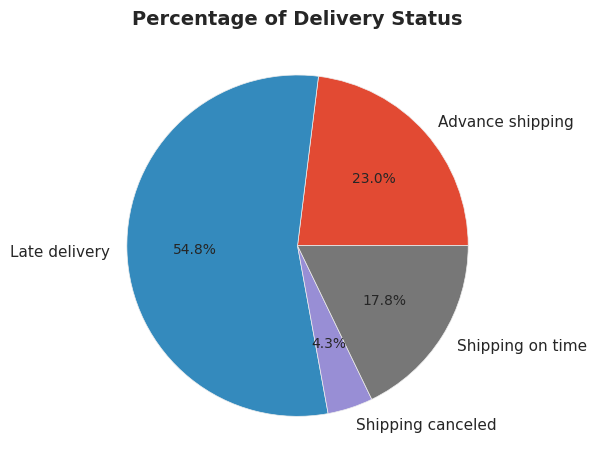

In [62]:
#Percentage of Delivery Status
delivery_counts = df.groupby('Delivery Status')['Customer Id'].count()

# plot a pie chart
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Percentage of Delivery Status', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.savefig('./output/Percentage of Delivery Status.png', format='png', dpi=300)
plt.show()


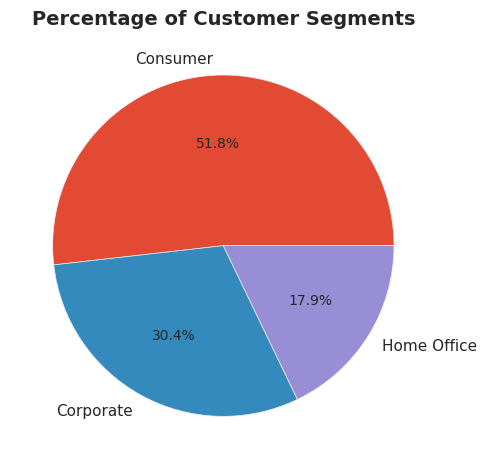

In [61]:
#Percentage of customers segments
segment_counts = df.groupby('Customer Segment')['Customer Id'].count()

# plot a pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Percentage of Customer Segments', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.savefig('./output/Percentage of customers segments.png', format='png', dpi=300)
plt.show()


ORDER STATUS DEFINITION

COMPLETE: The order has been processed successfully and delivered to the customer.

PENDING: The order is waiting to be processed.

CLOSED: The order has been closed, which usually means that it has been returned, cancelled or completed and no further action is required.

PENDING_PAYMENT: The order is waiting for payment to be processed.

CANCELED: The order has been cancelled and will not be processed further.

PROCESSING: The order is being processed and prepared for shipment.

SUSPECTED_FRAUD: The order is suspected to be fraudulent and requires further verification.

ON_HOLD: The order has been placed on hold and is not currently being processed.

PAYMENT_REVIEW: The order is under review for payment verification.

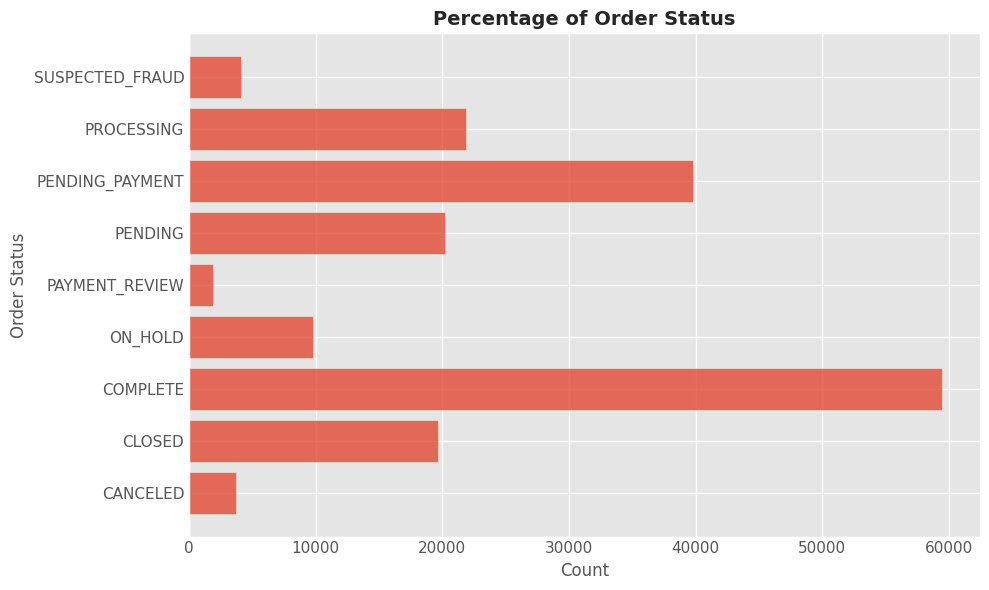

In [60]:
#Percentage of Order Status
orderstatus_counts = df.groupby('Order Status')['Customer Id'].count()

# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(orderstatus_counts.index, orderstatus_counts, alpha=0.8)
plt.style.use('ggplot')
plt.title('Percentage of Order Status', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.tight_layout()
plt.savefig('./output/Percentage of Order Status.png', format='png', dpi=300)
plt.show()


# Phase 2: Data Analysis
In this phase, the data will be analyzed to identify patterns and trends. Statistical techniques will be used to identify areas of improvement in the supply chain management process. Key performance indicators (KPIs) will be identified to measure the success of the optimization process.

1. Cost-to-serve analysis: You can calculate the cost of serving different customers or regions by analyzing the 'Sales' and 'Order Profit Per Order' columns. These columns can help you identify areas where costs can be minimized, such as by reducing shipping times or optimizing transportation routes.

In [ ]:
# group the sales by country and sum the sales for each country
sales_by_country = df.groupby('Order Country')['Sales'].sum()

# sort the countries by sales in descending order and select the top 10
top_10_countries = sales_by_country.sort_values(ascending=False).head(10)

# create a new dataframe with the top 10 countries and their sales in million dollars
top_10_df = pd.DataFrame({'Country': top_10_countries.index, 'Sales (in million dollars)': top_10_countries.values / 1000000})

print(top_10_df)

          Country  Sales (in million dollars)
0   United States                    4.879668
1          France                    2.879942
2          Mexico                    2.633195
3         Germany                    2.074172
4       Australia                    1.694622
5  United Kingdom                    1.612095
6          Brazil                    1.594320
7           China                    1.172902
8           Italy                    1.072182
9           India                    0.962397


ORDER STATUS DEFINITION

COMPLETE: The order has been processed successfully and delivered to the customer.

PENDING: The order is waiting to be processed.

CLOSED: The order has been closed, which usually means that it has been returned, cancelled or completed and no further action is required.

PENDING_PAYMENT: The order is waiting for payment to be processed.

CANCELED: The order has been cancelled and will not be processed further.

PROCESSING: The order is being processed and prepared for shipment.

SUSPECTED_FRAUD: The order is suspected to be fraudulent and requires further verification.

ON_HOLD: The order has been placed on hold and is not currently being processed.

PAYMENT_REVIEW: The order is under review for payment verification.

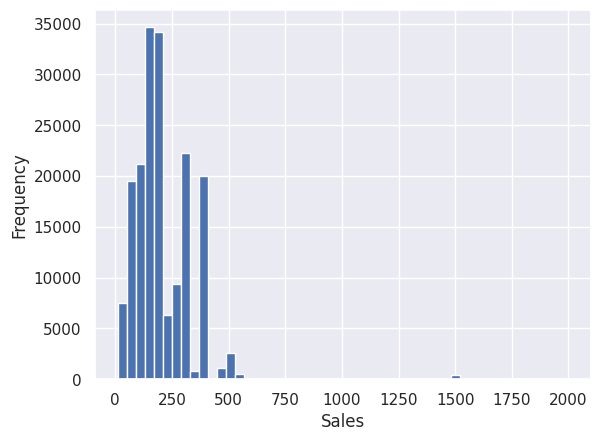

In [63]:
import matplotlib.pyplot as plt

plt.hist(df['Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [67]:
df[['order date (DateOrders)', 'shipping date (DateOrders)' ]]

,order date (DateOrders),shipping date (DateOrders)
0,2018-01-31 22:56:00,2018-02-03 22:56:00
1,2018-01-13 12:27:00,2018-01-18 12:27:00
2,2018-01-13 12:06:00,2018-01-17 12:06:00
3,2018-01-13 11:45:00,2018-01-16 11:45:00
4,2018-01-13 11:24:00,2018-01-15 11:24:00
...,...,...
180514,2016-01-16 03:40:00,2016-01-20 03:40:00
180515,2016-01-16 01:34:00,2016-01-19 01:34:00
180516,2016-01-15 21:00:00,2016-01-20 21:00:00
180517,2016-01-15 20:18:00,2016-01-18 20:18:00


In [24]:
# Filter the dataset to only include orders with negative benefit
negative_benefit_df = df[df['Benefit per order'] < 0]

# Calculate the total negative benefit
total_negative_benefit = negative_benefit_df['Benefit per order'].sum()

print('Total negative benefit: $', round(total_negative_benefit, 2))

Total negative benefit: $ -3883547.35


In [ ]:
df[['Sales', 'Order Profit Per Order', 'Benefit per order']].describe()

,Sales,Order Profit Per Order,Benefit per order
count,180519.000000,180519.000000,180519.000000
mean,203.772096,21.974989,21.974989
std,132.273077,104.433526,104.433526
min,9.990000,-4274.979980,-4274.979980
25%,119.980003,7.000000,7.000000
50%,199.919998,31.520000,31.520000
75%,299.950012,64.800003,64.800003
max,1999.989990,911.799988,911.799988


In [23]:
# Count the number of negative values in "Benefit per order"
negative_benefit = df[df["Benefit per order"] < 0].shape[0]

# Calculate the percentage of negative benefit per order
percentage_negative_benefit = (negative_benefit / len(df)) * 100

print(f"Percentage of negative benefit per order: {percentage_negative_benefit:.2f}%")


Percentage of negative benefit per order: 18.71%


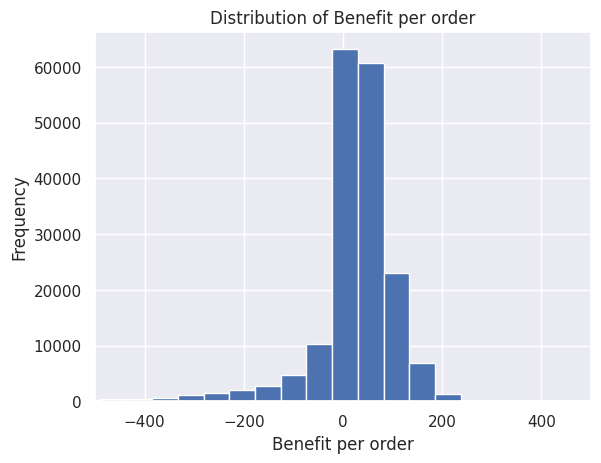

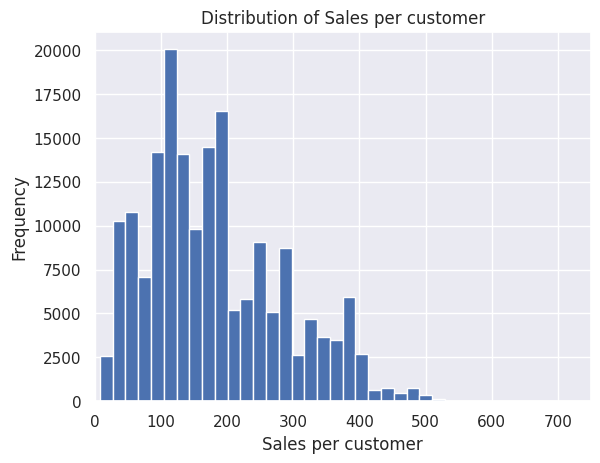

In [22]:
# plot histogram for "Benefit per order"
plt.xlim(-500, 500)
plt.hist(df['Benefit per order'], bins=100)
plt.xlabel('Benefit per order')
plt.ylabel('Frequency')
plt.title('Distribution of Benefit per order')
plt.show()

# plot histogram for "Sales per customer"
plt.xlim(0, 750)
plt.hist(df['Sales per customer'], bins=100)
plt.xlabel('Sales per customer')
plt.ylabel('Frequency')
plt.title('Distribution of Sales per customer')
plt.show()